In [1]:
import os


In [2]:
# Directory with co2 pictures
co2_dir = os.path.join('C:/Users/Fatma/Documents/entretien/jeu de données/all-data/co2')
# Directory with foam pictures
foam_dir = os.path.join('C:/Users/Fatma/Documents/entretien/jeu de données/all-data/foam')
# Directory with powder pictures
powder_dir = os.path.join('C:/Users/Fatma/Documents/entretien/jeu de données/all-data/powder')
# Directory with water pictures
water_dir = os.path.join('C:/Users/Fatma/Documents/entretien/jeu de données/all-data/water')
# Directory with wetchemical pictures
wetchemical_dir = os.path.join('C:/Users/Fatma/Documents/entretien/jeu de données/all-data/wetchemical')



In [76]:
train_co2_names = os.listdir(co2_dir)
print(train_co2_names[:5])

train_foam_names = os.listdir(foam_dir)
print(train_foam_names[:5])

train_water_names = os.listdir(water_dir)
print(train_water_names[:5])

['co2 (1).jpeg', 'co2 (10).jpeg', 'co2 (100).jpeg', 'co2 (101).jpeg', 'co2 (102).jpeg']
['foam (1).jpeg', 'foam (101).jpeg', 'foam (102).jpeg', 'foam (103).jpeg', 'foam (105).jpeg']
['water (1).jpeg', 'water (10).jpeg', 'water (100).jpeg', 'water (101).jpeg', 'water (102).jpeg']


In [77]:
print('total co2 images:', len(os.listdir(co2_dir)))
print('total foam images:', len(os.listdir(foam_dir)))
print('total wetchemical images:', len(os.listdir(wetchemical_dir)))
print('total water images:', len(os.listdir(water_dir)))
print('total powder images:', len(os.listdir(powder_dir)))

total co2 images: 138
total foam images: 700
total wetchemical images: 240
total water images: 407
total powder images: 437


In [78]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Showing some co2 pictures...



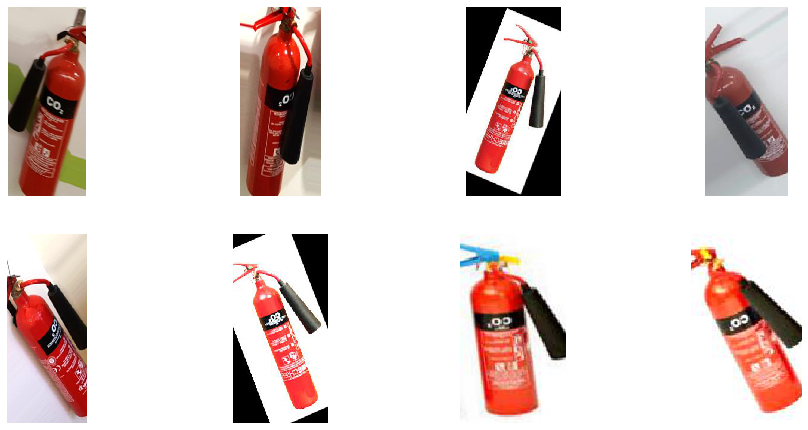

Showing some foam pictures...



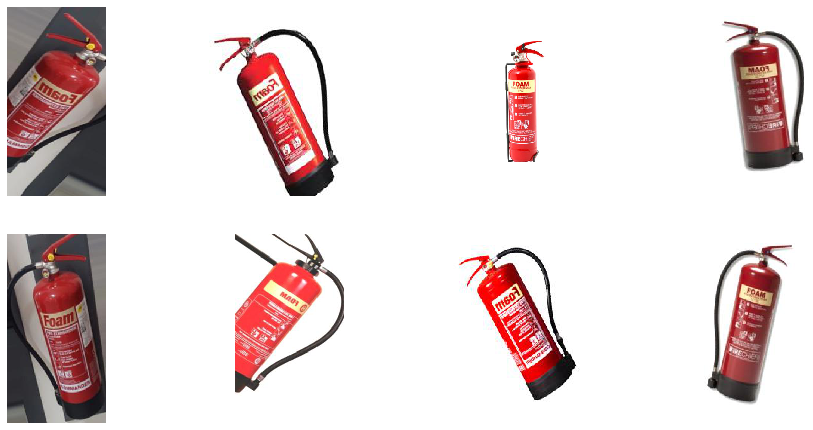

Showing some water pictures...



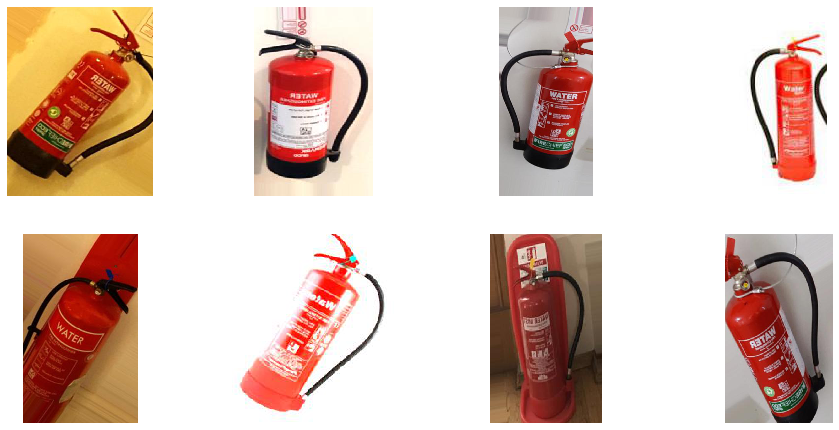

In [79]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_co2_pix = [os.path.join(co2_dir, fname) 
                for fname in train_co2_names[pic_index-8:pic_index]]
next_foam_pix = [os.path.join(foam_dir, fname) 
                for fname in train_foam_names[pic_index-8:pic_index]]
next_water_pix = [os.path.join(water_dir, fname) 
                for fname in train_water_names[pic_index-8:pic_index]]

print ("Showing some co2 pictures...")
print()
for i, img_path in enumerate(next_co2_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

print ("Showing some foam pictures...")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_foam_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()
print ("Showing some water pictures...")
print()
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
for i, img_path in enumerate(next_water_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [7]:
batch_size = 128


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'C:/Users/Fatma/Documents/entretien/jeu de données/all-data',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['co2','foam','powder','water','wetchemical'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

Found 1922 images belonging to 5 classes.


In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        3

In [12]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [13]:
total_sample=train_generator.n


In [14]:
n_epochs = 15


In [15]:
history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

Epoch 1/15
15/15 [==============================] - 39s 3s/step - loss: 1.5598 - acc: 0.3122
Epoch 2/15
15/15 [==============================] - 22s 1s/step - loss: 1.3706 - acc: 0.4326
Epoch 3/15
15/15 [==============================] - 20s 1s/step - loss: 1.0926 - acc: 0.5578
Epoch 4/15
15/15 [==============================] - 18s 1s/step - loss: 0.9314 - acc: 0.6315
Epoch 5/15
15/15 [==============================] - 17s 1s/step - loss: 0.8157 - acc: 0.6761
Epoch 6/15
15/15 [==============================] - 17s 1s/step - loss: 0.9279 - acc: 0.6709
Epoch 7/15
15/15 [==============================] - 19s 1s/step - loss: 0.6573 - acc: 0.7344
Epoch 8/15
15/15 [==============================] - 17s 1s/step - loss: 0.5543 - acc: 0.7476
Epoch 9/15
15/15 [==============================] - 19s 1s/step - loss: 0.7036 - acc: 0.7099
Epoch 10/15
15/15 [==============================] - 17s 1s/step - loss: 0.8929 - acc: 0.7008
Epoch 11/15
15/15 [==============================] - 20s 1s/step - lo

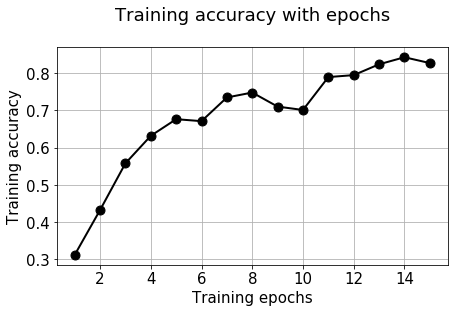

In [16]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

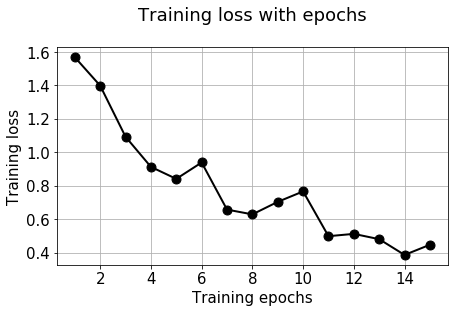

In [17]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [20]:

def train_CNN(train_directory,target_size=(200,200), classes=None,
              batch_size=128,num_epochs=20,num_classes=5,verbose=0):
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    import tensorflow as tf
    from tensorflow.keras.optimizers import RMSprop
    
    # ImageDataGenerator object instance with scaling
    train_datagen = ImageDataGenerator(rescale=1/255)

    # Flow training images in batches using the generator
    train_generator = train_datagen.flow_from_directory(
            train_directory,  # This is the source directory for training images
            target_size=target_size,  # All images will be resized to 200 x 200
            batch_size=batch_size,
            # Specify the classes explicitly
            classes = classes,
            # Since we use categorical_crossentropy loss, we need categorical labels
            class_mode='categorical')
    
    input_shape = tuple(list(target_size)+[3])
    
    # Model architecture
    model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 512 neuron in the fully-connected layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    
    # Optimizer and compilation
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
    
    # Total sample count
    total_sample=train_generator.n
    
    # Training
    model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=num_epochs,
        verbose=verbose)
    
    return model

In [25]:
train_directory = "C:/Users/Fatma/Documents/entretien/jeu de données/all-data/"

In [26]:
trained_model=train_CNN(train_directory=train_directory,classes=['co2','foam','powder','water','wetchemical'],
                        num_epochs=15,num_classes=5,verbose=1)

Found 1922 images belonging to 5 classes.
Epoch 1/15
15/15 [==============================] - 18s 1s/step - loss: 1.5649 - acc: 0.3200
Epoch 2/15
15/15 [==============================] - 32s 2s/step - loss: 1.5118 - acc: 0.3941
Epoch 3/15
15/15 [==============================] - 20s 1s/step - loss: 1.3387 - acc: 0.4766
Epoch 4/15
15/15 [==============================] - 19s 1s/step - loss: 0.8881 - acc: 0.6323
Epoch 5/15
15/15 [==============================] - 17s 1s/step - loss: 0.9160 - acc: 0.6349
Epoch 6/15
15/15 [==============================] - 19s 1s/step - loss: 0.7061 - acc: 0.7104
Epoch 7/15
15/15 [==============================] - 18s 1s/step - loss: 0.8117 - acc: 0.6945
Epoch 8/15
15/15 [==============================] - 18s 1s/step - loss: 0.5491 - acc: 0.7664
Epoch 9/15
15/15 [==============================] - 18s 1s/step - loss: 0.9439 - acc: 0.7274
Epoch 10/15
15/15 [==============================] - 18s 1s/step - loss: 0.4801 - acc: 0.7921
Epoch 11/15
15/15 [========

In [90]:
from PIL import Image


In [155]:
img_foam = Image.open('C:/Users/Fatma/Documents/entretien/jeu de données/all_data/foam/foam_test/foam (151).jpeg')
img_co2 = Image.open('C:/Users/Fatma/Documents/entretien/jeu de données/all_data/co2/co2_test/co2 (160).jpeg')
img_powder = Image.open('C:/Users/Fatma/Documents/entretien/jeu de données/all_data/powder/powder_test/powder (146).jpeg')
img_water = Image.open('C:/Users/Fatma/Documents/entretien/jeu de données/all_data/water/water_test/water (451).jpeg')


In [156]:
img_foam = img_foam.resize((200,200))
img_water = img_water.resize((200,200))
img_powder = img_powder.resize((200,200))
img_co2 = img_co2.resize((200,200))


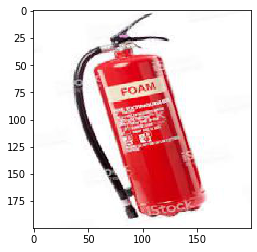

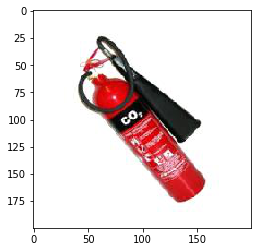

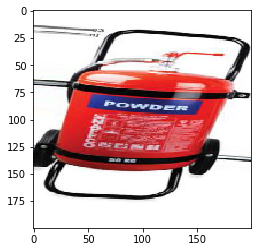

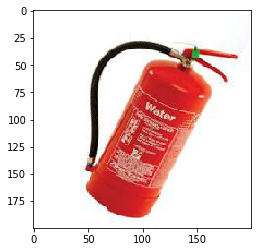

In [157]:
plt.imshow(img_foam)
plt.show()
plt.imshow(img_co2)
plt.show()
plt.imshow(img_powder)
plt.show()
plt.imshow(img_water)
plt.show()

In [158]:
# Expand dimensions for proper prediction
import numpy as np
img_foam=np.expand_dims(img_foam,axis=0)
img_water=np.expand_dims(img_water,axis=0)
img_powder=np.expand_dims(img_powder,axis=0)
img_co2=np.expand_dims(img_co2,axis=0)


In [159]:
trained_model.predict(img_foam)

array([[0., 1., 0., 0., 0.]], dtype=float32)

In [160]:
trained_model.predict(img_co2)

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        9.146046e-38]], dtype=float32)

In [161]:
trained_model.predict(img_powder)

array([[0., 0., 1., 0., 0.]], dtype=float32)

In [162]:
trained_model.predict(img_water)

array([[0.0000000e+00, 1.7206148e-06, 0.0000000e+00, 9.9999833e-01,
        0.0000000e+00]], dtype=float32)